In [51]:
%matplotlib inline


# Creating a timeline with lines, dates, and text

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import sqlite3

con = sqlite3.connect('main.db')


if 0:
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
else:
    sql = 'select tag, date(creator_dt) from releases where project_id=1'
    releases = con.execute(sql).fetchall()
    print(releases[:3])

[('0.1', '2010-04-16'), ('0.10', '2013-06-13'), ('0.10.1', '2013-06-14')]


Next, we'll create a stem plot with some variation in levels as to
distinguish even close-by events. We add markers on the baseline for visual
emphasis on the one-dimensional nature of the time line.

For each event, we add a text label via `~.Axes.annotate`, which is offset
in units of points from the tip of the event line.

Note that Matplotlib will automatically plot datetime inputs.



[]


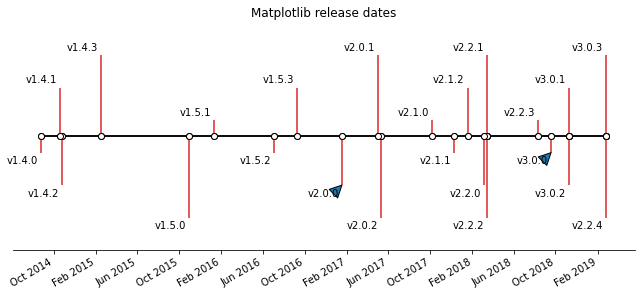

In [53]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="black", markerfacecolor="white")  # Baseline and markers on it.

releases = zip(dates, levels, names)
ax.plot(dates, np.zeros_like(dates), "-o",
        color="black", markerfacecolor="white")  # Baseline and markers on it.

# annotate lines
astyle = dict(textcoords="offset points",
                horizontalalignment="right")
for a_date, a_level, name in releases:
        ax.annotate(name, xy=(a_date, a_level),
                xytext=(-3, np.sign(a_level)*3),
                arrowprops=dict() if name.endswith('0.0') else None,
                verticalalignment="bottom" if a_level > 0 else "top",
                **astyle)

major_dates = [date for date,_,name in releases if name.endswith('.0.0')]
print(major_dates)

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.set(title="Matplotlib release dates")

ax.margins(y=0.2)
plt.show()